# Dominando o Pandas: A Biblioteca preferida entre os Cientistas de Dados (Parte 2) - OCEAN
www.minerandodados.com.br
"Aprenda Data Science e Alavanque sua Carreira :) "
https://minerandodados.com.br/dominando-o-pandas-datascience-dozero/

# Análise de Dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

Carregar a base de dados na memória. Para isso use o método read_csv() do Pandas, veja:
dataset = pd.read_csv('/home/rodrigo/scripts/minerandodados/kc_house_data.csv', sep=',')
No comando acima criamos uma variável chamada “dataset”, esta recebe o caminho do arquivo e em seguida usamos
o parâmetro sep=’,’ para dizer que o separador de colunas da nossa base é a vírgula.

A variável dataset agora é um objeto do tipo dataframe.

In [3]:
dataset = pd.read_csv('kc_house_dataC2.csv', sep=',')

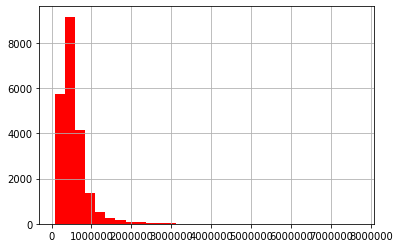

In [4]:
# Plotar um histograma da coluna ‘price’.
import matplotlib.pyplot as plt
%matplotlib inline

# %matplotlib notebook
dataset['price'].hist(bins=30, color='red')

A primeira linha do comando acima, configura o jupyter notebook para exibir o gráfico na célula do notebook.

Na segunda linha plotamos um histograma da coluna ‘price’ passando como parâmetro o número de bins e 
parâmetro color=’red’ para colocar o gráfico em vermelho.

O número de bins é a quantidade de caixas que quero agrupar os dados.

Vimos no gráfico que a grande maioria dos preços são entre 1 e 2 milhões, poucos casos de 3 milhões.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE785F2400>,
      dtype=object)

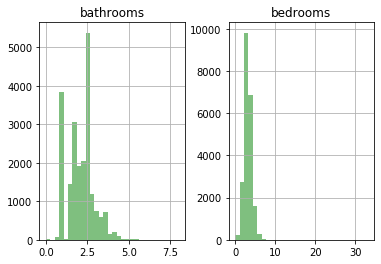

In [5]:
# Vamos plotar também um histograma com 2 colunas, e usar alguns parâmetros para customizar o gráfico, veja:
# %matplotlib notebook
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

Acima plotamos um histograma para a coluna bathrooms(banheiros) e outro para a coluna bedrooms(quartos).

Nesse gráfico podemos ver a distribuição dos números de banheiros dos imóveis (bathrooms).

Fica claro no gráfico que a maioria dos imóveis possuem de 1 a 3 banheiros.

O parâmetro alpha permite controlar a opacidade da cor.

Pode ser interessante diminuir esse valor, caso queira que as linhas do fundo do gráfico se sobressaem.

O parâmetro color define a cor das barras do gráfico para verde (Green).

# Estatistica Descritiva
Na tarefa de análise de dados, algo essencial é obter informações estatísticas dos dados.

In [6]:
# E se quisermos saber qual o número médio de quartos têm os imóveis da base?
dataset['bedrooms'].mean()

3.3709102688694523

O método mean() (média) nos dá essa informação.
E no caso do número máximo e mínimo de quartos? Ou seja, qual o maior valor da coluna bedrooms?
Use o método max() e min()

In [7]:
dataset['bedrooms'].max()

33.0

In [8]:
dataset['bedrooms'].min()

0.0

O método std() calcula o desvio padrão da coluna.
O desvio padrão é uma medida interessante para ver a variabilidade dos dados.
O exemplo abaixo calcula o desvio padrão para a coluna bedrooms:

In [9]:
dataset['bedrooms'].std()

0.9300844679399579

In [10]:
# O Pandas possui métodos para calcular a simetria dos dados veja o método skew():
dataset['bedrooms'].skew()

1.9744391609000942

In [11]:
dataset.skew()

id                0.243329
price             4.024069
bedrooms          1.974439
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616107
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [12]:
# Se quiser várias medidas juntas use o comando describe().
dataset['bedrooms'].describe()

count    21609.000000
mean         3.370910
std          0.930084
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

# Extraindo Insights

Uma forma de explorar os dados em busca de obter conhecimento é investir na visualização de dados. Dominando o Pandas
Nesse artigo mostramos como plotar os gráficos certos visando obter insights.
O Pandas nos permite de forma rápida e fácil plotar um gráfico do tipo BoxPlot.
Esse gráfico nos mostra diversas informações relevantes, veja:

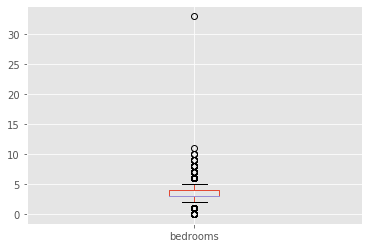

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
matplotlib.style.use('ggplot')
dataset.boxplot(column='bedrooms')

In [16]:
# Se quiser conhecer os estilos disponíveis use o comando: 
matplotlib.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

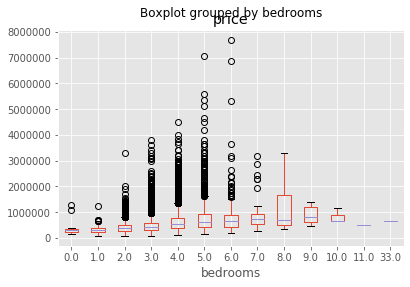

In [17]:
# Podemos também plotar um gráfico do tipo Box de uma coluna agrupado por outra coluna, veja:
#%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

# Correlação de Variáveis
Outro recurso interessante para fazer análise de dados é visualizar a correlação entre as variáveis. Dominando o Pandas
Será que existe uma correlação entre o número de banheiros do imóvel e o seu preço?
Ou, o número de quartos e o preço? Dominando o Pandas

Veja que com o método corr() do pandas podemos calcular a correlação entre todas as colunas do dataset.

In [18]:
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001235,0.005160,-0.012258,-0.132109,0.018595,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308321,0.525138,0.702035,0.089661,0.256791,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001235,0.308321,1.000000,0.515929,0.576679,0.031684,0.175440,-0.006589,0.079515,0.028534,0.356972,0.477618,0.303078,0.154197,0.018827,-0.152706,-0.008963,0.129498,0.391670,0.029221
bathrooms,0.005160,0.525138,0.515929,1.000000,0.754665,0.087740,0.500626,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576679,0.754665,1.000000,0.172826,0.353922,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031684,0.087740,0.172826,1.000000,-0.005210,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018595,0.256791,0.175440,0.500626,0.353922,-0.005210,1.000000,0.023695,0.029432,-0.263740,0.458171,0.523863,-0.245708,0.489298,0.006330,-0.059093,0.049656,0.125399,0.279856,-0.011280
waterfront,-0.002721,0.266369,-0.006589,0.063744,0.103818,0.021604,0.023695,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079515,0.187737,0.284611,0.074710,0.029432,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028534,-0.124982,-0.058753,-0.008958,-0.263740,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


A correlação que o pandas implementa por padrão é a correlação de Pearson.
Este coeficiente assume valores entre -1 e 1, onde um valor 1 significa uma correlação positiva perfeita entre as variáveis
e um valor -1 uma correlação negativa perfeita entre as variáveis.
Os valores 0 significa que não há uma correlação entre as variáveis. 

Podemos implementar também a correlação de Spearman. A diferença aqui é que essa calcula a correlação não linear entre as variáveis.

In [19]:
dataset.corr('spearman')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004178,0.006185,0.015051,0.001656,-0.116792,0.018905,-0.003573,0.012552,-0.023969,0.019835,0.003523,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735
price,0.004178,1.000000,0.344615,0.497160,0.644191,0.074939,0.322359,0.115089,0.293931,0.018490,0.658215,0.541752,0.251704,0.102038,0.101876,-0.008735,0.456409,0.063537,0.572290,0.062766
bedrooms,0.006185,0.344615,1.000000,0.521451,0.647395,0.216479,0.227565,-0.007604,0.081405,0.012748,0.380555,0.539755,0.230484,0.180037,0.016863,-0.167202,-0.021236,0.191430,0.443878,0.201530
bathrooms,0.015051,0.497160,0.521451,1.000000,0.745526,0.068805,0.546776,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111
sqft_living,0.001656,0.644191,0.647395,0.745526,1.000000,0.304159,0.401232,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864
sqft_lot,-0.116792,0.074939,0.216479,0.068805,0.304159,1.000000,-0.234460,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316
floors,0.018905,0.322359,0.227565,0.546776,0.401232,-0.234460,1.000000,0.023876,0.019641,-0.287878,0.501672,0.599258,-0.272436,0.551660,0.012570,-0.061427,0.024616,0.148640,0.305398,-0.231411
waterfront,-0.003573,0.115089,-0.007604,0.049522,0.070326,0.085601,0.023876,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271
view,0.012552,0.293931,0.081405,0.155549,0.232994,0.117033,0.019641,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520
condition,-0.023969,0.018490,0.012748,-0.162891,-0.062638,0.114724,-0.287878,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.066180,-0.022416,-0.022341,-0.085270,-0.086905,0.117719


Vamos investigar melhor a correlação das colunas com o preço.
Veja que algumas colunas tem uma alta correlação com preço.
Isso quer dizer que essas colunas impactam muito no preço dos imóveis, veja:

In [20]:
dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515929,0.576679,0.175440,-0.006589,0.356972,0.308321
bathrooms,0.515929,1.000000,0.754665,0.500626,0.063744,0.664983,0.525138
sqft_living,0.576679,0.754665,1.000000,0.353922,0.103818,0.762704,0.702035
floors,0.175440,0.500626,0.353922,1.000000,0.023695,0.458171,0.256791
waterfront,-0.006589,0.063744,0.103818,0.023695,1.000000,0.082775,0.266369
grade,0.356972,0.664983,0.762704,0.458171,0.082775,1.000000,0.667434
price,0.308321,0.525138,0.702035,0.256791,0.266369,0.667434,1.000000


Repare que as colunas ‘sqft_living’ , e ‘grade’ tiveram uma correlação positiva com a variável ‘price’.
Já a coluna ‘waterfront’ teve uma baixa correlação. Dominando o Pandas

O que essas colunas significam?
sqft_living : Quantidade de metros quadrados do interior do imóvel.
waterfront: Imóvel tem vista para o mar ou não.
grade: Um índice de qualidade do design e construção do imóvel, onde valores mais altos significam imóveis com 
    qualidade de construção superior.
    
Interessante aqui é que se o imóvel tem uma vista para o mar, isso não tem tanta correlação com o preço. 

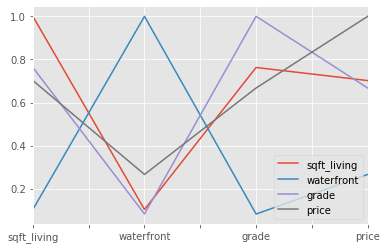

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

É possível ver a relação das linhas com a variável ‘price’.
Veja que a linha verde (grade) e azul (sqft_living) quando próximas a variável ‘price’ se mantém 
acima de 0.6 enquanto a linha laranja (waterfront) se mantém bem abaixo.
Para plotar correlação existem outras bibliotecas que nos dão uma visão bem melhor, como a seaborn.  
Porém, para uma rápida visualização o pandas já atende bem.

In [22]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Tabelas Pivot
As tabelas pivot são úteis para fazer agrupamentos nos dados. Dominando o Pandas
Essa funcionalidade é bastante eficiente e nos dar uma enorme vantagem em termos de tempo e desempenho computacional.
Imagine fazer agrupamento de bases de dados muito grande na mão?
Por exemplo, se quisermos contar a quantidade de imóveis agrupados pelos que têm e não tem visão para o mar e ainda 
pelo número de andares?

Veja como isso pode ser fácil:

In [23]:
dataset.pivot_table('id',index=["waterfront","floors"],aggfunc='count',margins=True)

id
waterfront floors       
0          1.0     10622
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21612

Com esse sumário dos dados ficou claro que a grande maioria dos imóveis não tem visão para o mar e são imóveis de 1 e 2 andares. 😉

O método pivot_table() recebe o primeiro parâmetro “id” que a coluna será o resultado da contagem dos dados agrupados.
O parâmetro “index” são as colunas que quero agrupar.
O parâmetro “aggfunc” uso para definir a função de agregação, no meu caso fiz a contagem dos dados, mas é possível fazer soma, calcular a média entre outras operações.

E por fim, o último parâmetro “margins” definido como “true” para imprimir o total de registros na última linha.

# Crosstab
Na tradução livre essa funcionalidade seria chamada Tabulação Cruzada. Dominando o Pandas

Esse recurso é bem interessante, principalmente quando temos uma variável resposta ou classe.
Basicamente o que essa funcionalidade faz é cruzar os valores das variáveis.

Veja como o Pandas implementa:
Queremos cruzar as colunas ‘bedrooms’ e ‘condition’ veja:

In [24]:
pd.crosstab(dataset['bedrooms'],dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


O código acima é bem simples, apenas passei as colunas ‘bedrooms’ e ‘condition’ como parâmetros para o método crosstab()
A coluna ‘condition’ significa um índice entre 1 a 5 da condição do imóvel.
Com o cruzamento dessas colunas, podemos ver por exemplo, qual a distribuição dos imóveis por número de quartos (bedrooms) 
com relação suas condições (condition).
Analisando a tabela acima vemos que o maior número de imóveis na condição 5 são os imóveis que possuem 3 quartos.

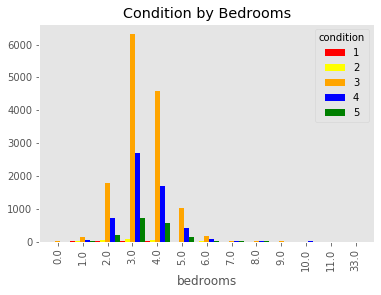

In [25]:
# Agora vamos visualizar esses dados em um gráfico:
table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)

O código acima é bem simples, para simplificar coloquei dentro do objeto ‘table’ a tabulação cruzada.
Em seguida, chamei o método plot passando o parâmetro “kind” com o valor ‘bar’ para informar que é um gráfico de barras.
O parâmetro ‘width’ define a largura das barras, o parâmetro ‘color’ recebe uma lista com as legendas e cores dos valores
do eixo x (barras).
Em seguida usei o parâmetro ‘title’ para definir um título superior para o gráfico e por fim o parâmetro ‘grid’ 
igual a False para remover as linhas do fundo do gráfico.
[shareaholic app=”share_buttons” id=”26541438″]
[epico_capture_sc id=”1002″]

# Trabalhando com Excel
Como ler uma carregar uma planilha do Excel ? simples, use o método read_excel().

Esse método permite ler uma planilha do disco, dessa forma criamos um Dataframe do pandas, veja:

dataframe_excel = pd.read_excel('/home/rodrigo/Downloads/Controle-de-Atividades-2.0.xlsx', sheetname=0, header=1)
Se você quiser fazer download da planilha que usei aqui está.

O método read_excel recebe no primeiro parâmetro o nome do arquivo, o parâmetro “sheetname” informo que quero carregar a primeira aba da planilha. Doinando o Pandas

O parâmetro header recebe o número da linha na qual será o cabeçalho da planilha, ou seja, aqui informamos em qual linha o pandas deve encontrar nossas colunas.

Como na primeira linha da planilha temos um título, disse ao pandas que o cabeçalho está na segunda linha, linha 1, pois, o número de linhas inicia com 0.

In [26]:
dataframe_excel = pd.read_excel('Controle-de-Atividades-2.0C.xlsx', sheetname=0, header=1)

C:\Users\OCEAN\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [27]:
dataframe_excel.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


# Indexando o Dataset
Outro parâmetro interessante é o index_col().

In [32]:
file = 'Controle-de-Atividades-2.0.xlsx'
dataframe_excel = pd.read_excel(file, sheetname=0, header=1, index_col=3)

In [33]:
dataframe_excel.head()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


O parâmetro index_col recebe o número da coluna que queremos indexar, nesse caso quero a coluna “Estado Atual” 
na posição 3 (as posições das colunas iniciam com 0).

Com o Dataframe indexado pela coluna “Estado Atual” vou ordená-lo:

In [34]:
dataframe_excel.sort_index()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA


# Gerando Planilhas
Além de ler uma planilha do Excel o Pandas tem o método to_excel() responsável por gerar um arquivo do tipo xlsx. 


In [35]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
# Vou selecionar algumas colunas para ficar mais simples a visualização e gerar uma planilha menor, veja.
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3.0,1.00,1180,1.0,0
1,6414100192,538000.0,3.0,2.25,2570,2.0,0
2,5631500400,180000.0,2.0,1.00,770,1.0,0
3,2487200875,604000.0,4.0,3.00,1960,1.0,0
4,1954400510,510000.0,3.0,2.00,1680,1.0,0


In [37]:
# chamar o método to_excel para escrever para o disco o arquivo:
dataset[colunas].to_excel('planilha_pandas.xls',index=False)